In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from scipy import stats
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',300)

In [3]:
dados = []
for elem in os.listdir('json'):
    if 'json' in elem:
        dados.append(json.loads(open(os.path.join('json', elem),encoding='utf-8').read()) )
                 

In [4]:
colunas_nivel = ['tempoParado',
    'tempoMovimentando',
    'tempoAtirando',
    'tempoRecarregando',
    'tempoSliding',
    'tempoDash',
    'tempoPulando',
    'tempoCaindo',
    'tempoAgachado',
    'quantidadeTiros',
    'quantidadeTirosAcertados',
    'quantidadeTirosAcertadosCausandoDano',
    'quantidadeTirosAcertadosSemCausarDano',
    'quantidadeTirosErrados',
    'quantidadeAgachado',
    'quantidadePulos',
    'quantidadeDash',
    'quantidadeReloadApertando',
    'quantidadeReloadAuto',
    'distanciaPercorrida' ]

In [57]:
def parseiaNivelColuna(dados_json):

    dict_compl =  {}
    
    for nivel in dados_json['niveis']:
        dict_nivel = {}
        id_nivel = str(nivel['ID'])
        usou_cheat = [ nivel['cheat'] ] 
        
        
        
        dict_nivel['usou_cheat_'+ id_nivel] = usou_cheat
        dict_nivel['nota_dificuldade_' + id_nivel] = [nivel['notaDificuldade']]
        dict_nivel['dificuldade_apropriada_' + id_nivel] = [nivel['difuldadeApropriada']]
        dict_nivel['nivelTedioso_' + id_nivel] = [nivel['nivelTedioso']]
        dict_nivel['nivelDivertido_' + id_nivel] = [nivel['nivelDivertido']]
        dict_nivel['nivelFrustrante_' + id_nivel] = [nivel['nivelFrustrante']]
        dict_nivel['tempoTotal_' + id_nivel] = [nivel['tempoTotal']]
        dict_nivel['quantidadeMortes_' + id_nivel ] = [nivel['quantidadeMortes']]
       
         
        if not usou_cheat:
            #print(str(nivel['cheat']) + id_nivel)
            for column in colunas_nivel:
                #print(nivel['dadosAntesMorrer'][-1][column])
                dict_nivel[column + '_' + 'nvl_' + id_nivel] = [ nivel['dadosAntesMorrer'][-1][column] ]
        else:
            """
            encontra a melhor tentativa , a melhor tentativa foi 
            definida nos casos em que a pessoa não consegue passar
            como aquela em que o jogador conseguiu derrotar o maior número de inimigos.
            """
            
            melhor_tentativa = 0
            melhor_ini_derrotados = 0
            for i,tentativa in enumerate(nivel['dadosAntesMorrer']):
                if (len(tentativa['inimigosDerrotados']) > melhor_ini_derrotados):
                    melhor_ini_derrotados = len(tentativa['inimigosDerrotados'])
                    melhor_tentativa = i

            for column in colunas_nivel:
                dict_nivel[column + '_' + 'nvl_' + id_nivel] = [ nivel['dadosAntesMorrer'][melhor_tentativa][column] ] 
                

        #print(dict_nivel)
        dict_compl = {**dict_compl , **dict_nivel}

    #print(dict_compl)
    df_nivel = pd.DataFrame(dict_compl)
    
    return df_nivel

In [58]:
def parserDados(data):
    """ Recebe o json dos dados do teste e cria um dataFrame com todos os dados."""
    df  = []
    data.keys()
    #print ({key : [value] for key,value in (data['questionarioInicial']).items() })
    
    df_quest_inic = pd.DataFrame({'inicial_' + key : [value] for key,value in (data['questionarioInicial']).items() } )
    df_quest_final = pd.DataFrame({'final_' + key : [value] for key,value in (data['questionarioFinal']).items() } )
    df_nivel = parseiaNivelColuna(data)
    
    
    
    
    
    
    df = pd.concat([df_quest_inic, df_quest_final, df_nivel], sort=True, axis=1)
    return df


dados_experimento = []
#print(type(dados_experimento))
for dado in dados:
    df_aux = parserDados(dado)  
    dados_experimento.append(df_aux)
    

df_final = pd.concat(dados_experimento).reset_index(drop=True)



In [59]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [60]:
filtroCheat = (df_final.usou_cheat_0 == False) & (df_final.usou_cheat_1 == False) & (df_final.usou_cheat_2 == False) & (df_final.usou_cheat_3 == False) & (df_final.usou_cheat_4 == False) & (df_final.usou_cheat_5 == False) & (df_final.usou_cheat_6 == False) & (df_final.usou_cheat_7 == False) & (df_final.usou_cheat_8 == False)


In [61]:
df_final

,inicial_idade,inicial_sexo,inicial_q3,inicial_q4,inicial_q5,inicial_q6,inicial_q7,inicial_q8,inicial_q9_a,inicial_q9_b,inicial_q9_c,inicial_q9_d,final_q1_a,final_q1_b,final_q1_c,final_q1_d,final_q1_e,final_q1_f,final_q2,final_q3_a,final_q3_b,final_q3_c,final_q4_a,final_q4_b,final_q4_c,final_q4_d,final_q4_e,final_q4_f,final_q5_a,final_q5_b,final_q5_c,final_q5_d,final_q5_e,final_q5_f,final_q5_g,final_q5_h,usou_cheat_0,nota_dificuldade_0,dificuldade_apropriada_0,nivelTedioso_0,nivelDivertido_0,nivelFrustrante_0,tempoTotal_0,quantidadeMortes_0,tempoParado_nvl_0,tempoMovimentando_nvl_0,tempoAtirando_nvl_0,tempoRecarregando_nvl_0,tempoSliding_nvl_0,tempoDash_nvl_0,tempoPulando_nvl_0,tempoCaindo_nvl_0,tempoAgachado_nvl_0,quantidadeTiros_nvl_0,quantidadeTirosAcertados_nvl_0,quantidadeTirosAcertadosCausandoDano_nvl_0,quantidadeTirosAcertadosSemCausarDano_nvl_0,quantidadeTirosErrados_nvl_0,quantidadeAgachado_nvl_0,quantidadePulos_nvl_0,quantidadeDash_nvl_0,quantidadeReloadApertando_nvl_0,quantidadeReloadAuto_nvl_0,distanciaPercorrida_nvl_0,usou_cheat_1,nota_dificuldade_1,dificuldade_apropriada_1,nivelTedioso_1,nivelDivertido_1,nivelFrustrante_1,tempoTotal_1,quantidadeMortes_1,tempoParado_nvl_1,tempoMovimentando_nvl_1,tempoAtirando_nvl_1,tempoRecarregando_nvl_1,tempoSliding_nvl_1,tempoDash_nvl_1,tempoPulando_nvl_1,tempoCaindo_nvl_1,tempoAgachado_nvl_1,quantidadeTiros_nvl_1,quantidadeTirosAcertados_nvl_1,quantidadeTirosAcertadosCausandoDano_nvl_1,quantidadeTirosAcertadosSemCausarDano_nvl_1,quantidadeTirosErrados_nvl_1,quantidadeAgachado_nvl_1,quantidadePulos_nvl_1,quantidadeDash_nvl_1,quantidadeReloadApertando_nvl_1,quantidadeReloadAuto_nvl_1,distanciaPercorrida_nvl_1,usou_cheat_2,nota_dificuldade_2,dificuldade_apropriada_2,nivelTedioso_2,nivelDivertido_2,nivelFrustrante_2,tempoTotal_2,quantidadeMortes_2,tempoParado_nvl_2,tempoMovimentando_nvl_2,tempoAtirando_nvl_2,tempoRecarregando_nvl_2,tempoSliding_nvl_2,tempoDash_nvl_2,tempoPulando_nvl_2,tempoCaindo_nvl_2,tempoAgachado_nvl_2,quantidadeTiros_nvl_2,quantidadeTirosAcertados_nvl_2,quantidadeTirosAcertadosCausandoDano_nvl_2,quantidadeTirosAcertadosSemCausarDano_nvl_2,quantidadeTirosErrados_nvl_2,quantidadeAgachado_nvl_2,quantidadePulos_nvl_2,quantidadeDash_nvl_2,quantidadeReloadApertando_nvl_2,quantidadeReloadAuto_nvl_2,distanciaPercorrida_nvl_2,usou_cheat_3,nota_dificuldade_3,dificuldade_apropriada_3,nivelTedioso_3,nivelDivertido_3,nivelFrustrante_3,tempoTotal_3,quantidadeMortes_3,tempoParado_nvl_3,tempoMovimentando_nvl_3,tempoAtirando_nvl_3,tempoRecarregando_nvl_3,tempoSliding_nvl_3,tempoDash_nvl_3,tempoPulando_nvl_3,tempoCaindo_nvl_3,tempoAgachado_nvl_3,quantidadeTiros_nvl_3,quantidadeTirosAcertados_nvl_3,quantidadeTirosAcertadosCausandoDano_nvl_3,quantidadeTirosAcertadosSemCausarDano_nvl_3,quantidadeTirosErrados_nvl_3,quantidadeAgachado_nvl_3,quantidadePulos_nvl_3,quantidadeDash_nvl_3,quantidadeReloadApertando_nvl_3,quantidadeReloadAuto_nvl_3,distanciaPercorrida_nvl_3,usou_cheat_4,nota_dificuldade_4,dificuldade_apropriada_4,nivelTedioso_4,nivelDivertido_4,nivelFrustrante_4,tempoTotal_4,quantidadeMortes_4,tempoParado_nvl_4,tempoMovimentando_nvl_4,tempoAtirando_nvl_4,tempoRecarregando_nvl_4,tempoSliding_nvl_4,tempoDash_nvl_4,tempoPulando_nvl_4,tempoCaindo_nvl_4,tempoAgachado_nvl_4,quantidadeTiros_nvl_4,quantidadeTirosAcertados_nvl_4,quantidadeTirosAcertadosCausandoDano_nvl_4,quantidadeTirosAcertadosSemCausarDano_nvl_4,quantidadeTirosErrados_nvl_4,quantidadeAgachado_nvl_4,quantidadePulos_nvl_4,quantidadeDash_nvl_4,quantidadeReloadApertando_nvl_4,quantidadeReloadAuto_nvl_4,distanciaPercorrida_nvl_4,usou_cheat_5,nota_dificuldade_5,dificuldade_apropriada_5,nivelTedioso_5,nivelDivertido_5,nivelFrustrante_5,tempoTotal_5,quantidadeMortes_5,tempoParado_nvl_5,tempoMovimentando_nvl_5,tempoAtirando_nvl_5,tempoRecarregando_nvl_5,tempoSliding_nvl_5,tempoDash_nvl_5,tempoPulando_nvl_5,tempoCaindo_nvl_5,tempoAgachado_nvl_5,quantidadeTiros_nvl_5,quantidadeTirosAcertados_nvl_5,quantidadeTirosAcertadosCau

In [10]:
def pegaColunas(data, query):
    'retorna colunas com base em uma query'
    columns = [x for x in data.columns if query in x]
    
    values = data[columns]
    
    return values   

Text(0.5, 1.0, 'Média dificuldade x Nível')

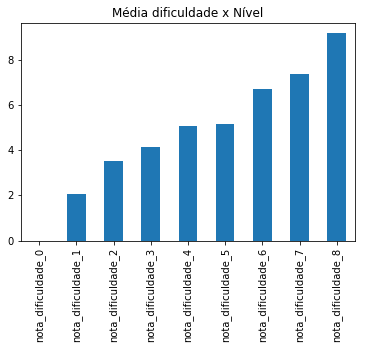

In [11]:
teste = pegaColunas(df_final, 'nota_dificuldade')


teste.mean().plot(kind='bar')
plt.title('Média dificuldade x Nível')

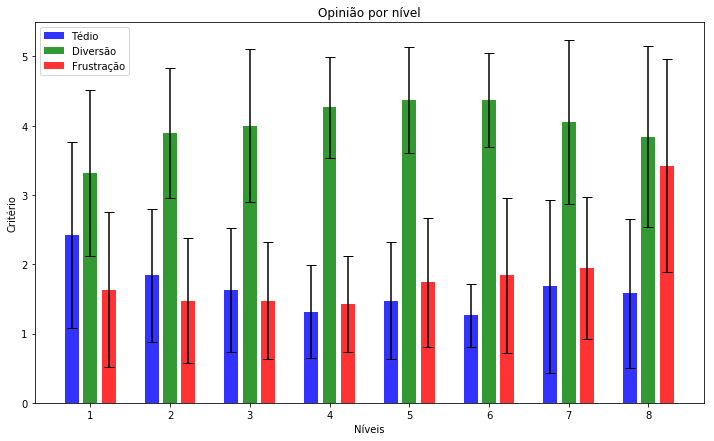

In [12]:
#Gerar gráfico de barrars nível x [tédio, diversão , frustração]

ted_col = pegaColunas(df_final, 'nivelTedioso')
div_col = pegaColunas(df_final, 'nivelDivertido')
frus_col = pegaColunas(df_final, 'nivelFrustrante')
#(ted.mean().values,div.mean().values,frus.mean().values)
#to-do, continuar desenvolvendo este gráfico.
#plt.figure(figsize=(20,20))
#pd.concat([ted,div,frus],axis=1).plot(kind='bar',)

ted = ted_col.mean().values[1:]
div = div_col.mean().values[1:]
frus = frus_col.mean().values[1:]

ted_error = ted_col.std().values[1:]
div_error = div_col.std().values[1:]
frus_error = frus_col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(12, 7))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index + 0.12, ted , bar_width * 0.5 , alpha = opacity, color = 'b', label = 'Tédio', yerr = ted_error, capsize=5)

rects2 = plt.bar(index + bar_width  , div, bar_width * 0.5 , alpha = opacity , color='g', label = 'Diversão', yerr = div_error, capsize=5 )

rects3 = plt.bar(index  + bar_width * 2 - 0.12 , frus , bar_width  * 0.5 , alpha = opacity, color = 'r' , label = 'Frustração', yerr = frus_error, capsize=5)


plt.xlabel('Níveis')
plt.ylabel('Critério')
plt.title('Opinião por nível')
plt.xticks(index +  bar_width, (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('OpiniaoXNivel.png')


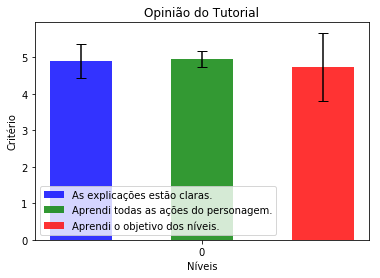

In [13]:
#Gerar gráfico de barrars nível x [tédio, diversão , frustração]

ted_col = pegaColunas(df_final, 'nivelTedioso')
div_col = pegaColunas(df_final, 'nivelDivertido')
frus_col = pegaColunas(df_final, 'nivelFrustrante')
#(ted.mean().values,div.mean().values,frus.mean().values)
#to-do, continuar desenvolvendo este gráfico.
#plt.figure(figsize=(20,20))
#pd.concat([ted,div,frus],axis=1).plot(kind='bar',)

ted = ted_col.mean().values[0]
div = div_col.mean().values[0]
frus = frus_col.mean().values[0]

ted_error = ted_col.std().values[0]
div_error = div_col.std().values[0]
frus_error = frus_col.std().values[0]

n_groups = 1

index = np.arange(n_groups)[0:]
bar_width = 4
opacity = 0.8

rects1 = plt.bar(index + 0.12, ted , bar_width * 0.5 , alpha = opacity, color = 'b', label = 'As explicações estão claras.', yerr = ted_error, capsize=5)

rects2 = plt.bar(index + bar_width  , div, bar_width * 0.5 , alpha = opacity , color='g', label = 'Aprendi todas as ações do personagem.', yerr = div_error, capsize=5 )

rects3 = plt.bar(index  + bar_width * 2 - 0.12 , frus , bar_width  * 0.5 , alpha = opacity, color = 'r' , label = 'Aprendi o objetivo dos níveis.', yerr = frus_error, capsize=5)


plt.xlabel('Níveis')
plt.ylabel('Critério')
plt.title('Opinião do Tutorial')
plt.xticks(index +  bar_width, (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('Opiniao_TutorialXNivel.png')


In [14]:
def plotaColunaCheat(data, query):
    'retorna colunas com base em uma query'
    columns = [x for x in data.columns if query in x]
    
    values = data[columns]
    
    return values   

<BarContainer object of 8 artists>

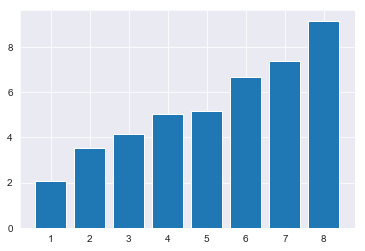

In [62]:
#teste.mean() 
x  = [ i for i in range (0,9)]


plt.bar(x[1:],teste.mean().values[1:]  )

[[1.         0.98838049]
 [0.98838049 1.        ]] 0.9768960009923866


,inicial_idade,inicial_sexo,inicial_q3,inicial_q4,inicial_q5,inicial_q6,inicial_q7,inicial_q8,inicial_q9_a,inicial_q9_b,inicial_q9_c,inicial_q9_d,final_q1_a,final_q1_b,final_q1_c,final_q1_d,final_q1_e,final_q1_f,final_q2,final_q3_a,final_q3_b,final_q3_c,final_q4_a,final_q4_b,final_q4_c,final_q4_d,final_q4_e,final_q4_f,final_q5_a,final_q5_b,final_q5_c,final_q5_d,final_q5_e,final_q5_f,final_q5_g,final_q5_h,usou_cheat_0,nota_dificuldade_0,dificuldade_apropriada_0,nivelTedioso_0,nivelDivertido_0,nivelFrustrante_0,tempoTotal_0,quantidadeMortes_0,tempoParado_nvl_0,tempoMovimentando_nvl_0,tempoAtirando_nvl_0,tempoRecarregando_nvl_0,tempoSliding_nvl_0,tempoDash_nvl_0,tempoPulando_nvl_0,tempoCaindo_nvl_0,tempoAgachado_nvl_0,quantidadeTiros_nvl_0,quantidadeTirosAcertados_nvl_0,quantidadeTirosAcertadosCausandoDano_nvl_0,quantidadeTirosAcertadosSemCausarDano_nvl_0,quantidadeTirosErrados_nvl_0,quantidadeAgachado_nvl_0,quantidadePulos_nvl_0,quantidadeDash_nvl_0,quantidadeReloadApertando_nvl_0,quantidadeReloadAuto_nvl_0,distanciaPercorrida_nvl_0,usou_cheat_1,nota_dificuldade_1,dificuldade_apropriada_1,nivelTedioso_1,nivelDivertido_1,nivelFrustrante_1,tempoTotal_1,quantidadeMortes_1,tempoParado_nvl_1,tempoMovimentando_nvl_1,tempoAtirando_nvl_1,tempoRecarregando_nvl_1,tempoSliding_nvl_1,tempoDash_nvl_1,tempoPulando_nvl_1,tempoCaindo_nvl_1,tempoAgachado_nvl_1,quantidadeTiros_nvl_1,quantidadeTirosAcertados_nvl_1,quantidadeTirosAcertadosCausandoDano_nvl_1,quantidadeTirosAcertadosSemCausarDano_nvl_1,quantidadeTirosErrados_nvl_1,quantidadeAgachado_nvl_1,quantidadePulos_nvl_1,quantidadeDash_nvl_1,quantidadeReloadApertando_nvl_1,quantidadeReloadAuto_nvl_1,distanciaPercorrida_nvl_1,usou_cheat_2,nota_dificuldade_2,dificuldade_apropriada_2,nivelTedioso_2,nivelDivertido_2,nivelFrustrante_2,tempoTotal_2,quantidadeMortes_2,tempoParado_nvl_2,tempoMovimentando_nvl_2,tempoAtirando_nvl_2,tempoRecarregando_nvl_2,tempoSliding_nvl_2,tempoDash_nvl_2,tempoPulando_nvl_2,tempoCaindo_nvl_2,tempoAgachado_nvl_2,quantidadeTiros_nvl_2,quantidadeTirosAcertados_nvl_2,quantidadeTirosAcertadosCausandoDano_nvl_2,quantidadeTirosAcertadosSemCausarDano_nvl_2,quantidadeTirosErrados_nvl_2,quantidadeAgachado_nvl_2,quantidadePulos_nvl_2,quantidadeDash_nvl_2,quantidadeReloadApertando_nvl_2,quantidadeReloadAuto_nvl_2,distanciaPercorrida_nvl_2,usou_cheat_3,nota_dificuldade_3,dificuldade_apropriada_3,nivelTedioso_3,nivelDivertido_3,nivelFrustrante_3,tempoTotal_3,quantidadeMortes_3,tempoParado_nvl_3,tempoMovimentando_nvl_3,tempoAtirando_nvl_3,tempoRecarregando_nvl_3,tempoSliding_nvl_3,tempoDash_nvl_3,tempoPulando_nvl_3,tempoCaindo_nvl_3,tempoAgachado_nvl_3,quantidadeTiros_nvl_3,quantidadeTirosAcertados_nvl_3,quantidadeTirosAcertadosCausandoDano_nvl_3,quantidadeTirosAcertadosSemCausarDano_nvl_3,quantidadeTirosErrados_nvl_3,quantidadeAgachado_nvl_3,quantidadePulos_nvl_3,quantidadeDash_nvl_3,quantidadeReloadApertando_nvl_3,quantidadeReloadAuto_nvl_3,distanciaPercorrida_nvl_3,usou_cheat_4,nota_dificuldade_4,dificuldade_apropriada_4,nivelTedioso_4,nivelDivertido_4,nivelFrustrante_4,tempoTotal_4,quantidadeMortes_4,tempoParado_nvl_4,tempoMovimentando_nvl_4,tempoAtirando_nvl_4,tempoRecarregando_nvl_4,tempoSliding_nvl_4,tempoDash_nvl_4,tempoPulando_nvl_4,tempoCaindo_nvl_4,tempoAgachado_nvl_4,quantidadeTiros_nvl_4,quantidadeTirosAcertados_nvl_4,quantidadeTirosAcertadosCausandoDano_nvl_4,quantidadeTirosAcertadosSemCausarDano_nvl_4,quantidadeTirosErrados_nvl_4,quantidadeAgachado_nvl_4,quantidadePulos_nvl_4,quantidadeDash_nvl_4,quantidadeReloadApertando_nvl_4,quantidadeReloadAuto_nvl_4,distanciaPercorrida_nvl_4,usou_cheat_5,nota_dificuldade_5,dificuldade_apropriada_5,nivelTedioso_5,nivelDivertido_5,nivelFrustrante_5,tempoTotal_5,quantidadeMortes_5,tempoParado_nvl_5,tempoMovimentando_nvl_5,tempoAtirando_nvl_5,tempoRecarregando_nvl_5,tempoSliding_nvl_5,tempoDash_nvl_5,tempoPulando_nvl_5,tempoCaindo_nvl_5,tempoAgachado_nvl_5,quantidadeTiros_nvl_5,quantidadeTirosAcertados_nvl_5,quantidadeTirosAcertadosCau

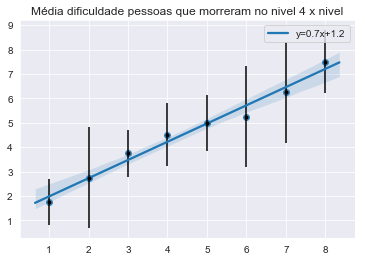

<Figure size 360x720 with 0 Axes>

In [101]:

filtro = (df_final.quantidadeMortes_1 + df_final.quantidadeMortes_2 + df_final.quantidadeMortes_3 + df_final.quantidadeMortes_4 + df_final.quantidadeMortes_5 + df_final.quantidadeMortes_6 + df_final.quantidadeMortes_7 + df_final.quantidadeMortes_8 < 7)

teste = pegaColunas(df_final[filtro] , 'nota_dificuldade')
teste = pegaColunas(df_final[filtro] , 'nota_dificuldade')

plt.title('Média dificuldade pessoas que morreram no nivel 4 x nivel') 

x  = [ i for i in range (1, 9)]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))
plt.figure(figsize=(5,10))
df_final[filtro] 

## 17 valor medio de mortes em todoas as fases
## quem morre menos sente menos dificuldade
## quem morre mais sente mais dificuldade
## logo a variavel influencia no desempenho do jogador

[[1.         0.98424042]
 [0.98424042 1.        ]] 0.9687292082501663


<Figure size 360x720 with 0 Axes>

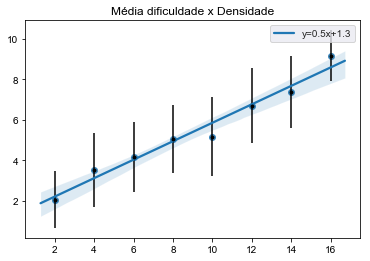

<Figure size 360x720 with 0 Axes>

In [16]:
teste = pegaColunas(df_final , 'nota_dificuldade')

plt.title('Média dificuldade x Densidade') 

x  = [ i*2 for i in range (1, 9)]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))
plt.figure(figsize=(5,10))

[[1.        0.9218145]
 [0.9218145 1.       ]] 0.8497419685130545


<Figure size 360x720 with 0 Axes>

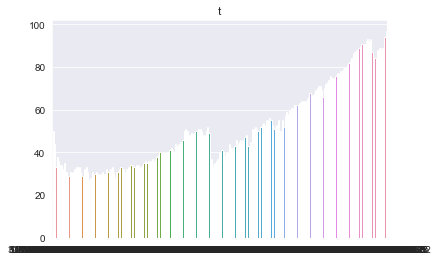

<Figure size 360x720 with 0 Axes>

In [17]:
plt.title('t') 

y  = [50.0,44.0,33.0,38.0,36.0,34.0,34.0,32.0,35.0,31.0,22.0,29.0,31.0,31.0,31.0,32.0,33.0,33.0,33.0,31.0,29.0,29.0,32.0,33.0,31.0,27.0,28.0,31.0,30.0,30.0,31.0,30.0,30.0,30.0,31.0,30.0,30.0,32.0,31.0,31.0,32.0,33.0,31.0,28.0,31.0,31.0,32.0,33.0,32.0,32.0,31.0,32.0,33.0,33.0,34.0,34.0,33.0,33.0,34.0,34.0,33.0,33.0,34.0,35.0,36.0,35.0,36.0,36.0,36.0,37.0,36.0,37.0,38.0,39.0,40.0,39.0,40.0,40.0,40.0,40.0,40.0,41.0,42.0,41.0,40.0,44.0,43.0,44.0,45.0,45.0,46.0,50.0,51.0,50.0,48.0,48.0,49.0,49.0,49.0,50.0,50.0,51.0,51.0,50.0,48.0,48.0,50.0,52.0,49.0,35.0,37.0,34.0,35.0,36.0,37.0,40.0,39.0,41.0,40.0,39.0,40.0,40.0,44.0,42.0,42.0,41.0,43.0,46.0,44.0,45.0,46.0,46.0,46.0,47.0,48.0,43.0,41.0,45.0,51.0,51.0,52.0,51.0,50.0,50.0,52.0,53.0,54.0,53.0,55.0,55.0,56.0,55.0,53.0,51.0,52.0,53.0,55.0,50.0,50.0,55.0,52.0,57.0,59.0,58.0,60.0,61.0,61.0,62.0,61.0,62.0,62.0,63.0,64.0,64.0,64.0,64.0,65.0,66.0,68.0,67.0,67.0,68.0,69.0,70.0,71.0,71.0,69.0,66.0,70.0,72.0,73.0,74.0,76.0,75.0,75.0,75.0,76.0,77.0,77.0,78.0,78.0,79.0,80.0,80.0,81.0,82.0,83.0,84.0,86.0,87.0,88.0,87.0,89.0,90.0,91.0,90.0,91.0,92.0,93.0,92.0,93.0,87.0,78.0,84.0,82.0,88.0,89.0,89.0,89.0,88.0,94.0,97.0]
x =[3.035184144973755,6.062493801116943,9.108428955078125,12.150734901428223,15.185662269592286,18.22866439819336,21.27399444580078,24.317472457885743,27.347564697265626,30.394794464111329,33.44142532348633,36.46626663208008,39.4891242980957,42.52622985839844,45.566890716552737,48.592830657958987,51.62393569946289,54.66682052612305,57.70920181274414,60.751548767089847,63.77582550048828,66.81647491455078,69.86357879638672,72.89205932617188,75.92414093017578,78.96802520751953,82.01396942138672,85.03993225097656,88.0659408569336,91.09619903564453,94.1219482421875,97.16910552978516,100.20358276367188,103.25360870361328,106.30382537841797,109.34709167480469,112.39199829101563,115.43606567382813,118.4657211303711,121.49527740478516,124.56007385253906,127.5794677734375,130.62525939941407,133.67013549804688,136.69775390625,139.74639892578126,142.79443359375,145.82498168945313,148.85394287109376,151.8950653076172,154.9408721923828,157.9885711669922,161.01724243164063,164.06533813476563,167.11032104492188,170.15672302246095,173.1855010986328,176.23422241210938,179.26577758789063,182.30828857421876,185.3379669189453,188.37767028808595,191.4240264892578,194.468017578125,197.50164794921876,200.55010986328126,203.57659912109376,206.6258544921875,209.67190551757813,212.7181854248047,215.74444580078126,218.79373168945313,221.8231964111328,224.84246826171876,227.88412475585938,230.92352294921876,233.95095825195313,236.99514770507813,240.0248565673828,243.05149841308595,246.08294677734376,249.11399841308595,252.14625549316407,255.19129943847657,258.2348327636719,261.2674560546875,264.2963562011719,267.33465576171877,270.38323974609377,273.4283752441406,276.4629821777344,279.498046875,282.54388427734377,285.56170654296877,288.5792236328125,291.6164245605469,294.6571044921875,297.6929626464844,300.73443603515627,303.7649230957031,306.814453125,309.8357849121094,312.87664794921877,315.91986083984377,318.9647216796875,322.01043701171877,325.03863525390627,328.07061767578127,331.0991516113281,334.145263671875,337.1792907714844,340.2259521484375,343.2571105957031,346.2997741699219,349.33905029296877,352.3830261230469,355.4072570800781,358.453369140625,361.4989013671875,364.52557373046877,367.5694274902344,370.6141357421875,373.64935302734377,376.69293212890627,379.7204284667969,382.75457763671877,385.7996826171875,388.849365234375,391.8981628417969,394.9464111328125,397.9758605957031,401.01861572265627,404.06341552734377,407.0903625488281,410.1114196777344,413.1304016113281,416.1497802734375,419.1982727050781,422.2270202636719,425.27264404296877,428.28997802734377,431.33782958984377,434.3761291503906,437.41485595703127,440.46429443359377,443.5106506347656,446.55230712890627,449.6010437011719,452.64300537109377,455.6889343261719,458.73651123046877,461.7832336425781,464.8155212402344,467.8428955078125,470.8816223144531,473.91876220703127,476.96331787109377,480.0003967285156,483.043212890625,486.0811767578125,489.124267578125,492.1651306152344,495.18695068359377,498.225341796875,501.2731018066406,504.2906188964844,507.3343200683594,510.3778381347656,513.413330078125,516.4591064453125,519.5057983398438,522.5345458984375,525.5833740234375,528.626953125,531.66162109375,534.68798828125,537.7355346679688,540.7528686523438,543.7908325195313,546.8319091796875,549.8801879882813,552.9266357421875,555.9603881835938,559.0088500976563,562.0280151367188,565.0745849609375,568.1190795898438,571.16650390625,574.2041625976563,577.2526245117188,580.2996826171875,583.3411865234375,586.3865966796875,589.4312744140625,592.4692993164063,595.504638671875,598.5425415039063,601.58251953125,604.6223754882813,607.6674194335938,610.6888427734375,613.7247314453125,616.7544555664063,619.7972412109375,622.8414916992188,625.886962890625,628.9188232421875,631.9526977539063,634.9967041015625,638.0422973632813,641.0917358398438,644.1362915039063,647.1854858398438,650.2213134765625,653.269287109375,656.3087158203125,659.340087890625,662.3856811523438,665.435546875,668.4699096679688,671.5025024414063,674.5375366210938,677.567138671875,680.610595703125,683.634521484375,686.6780395507813,689.7284545898438,692.7572631835938,695.8056030273438,698.837158203125,701.8809204101563,704.910400390625]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,y)

sns.barplot(x, y)

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, y), r2(x, y))
plt.figure(figsize=(5,10))

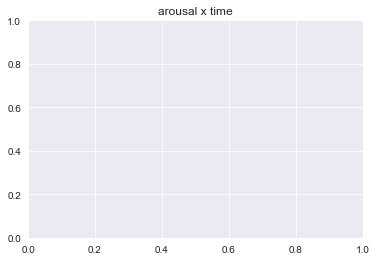

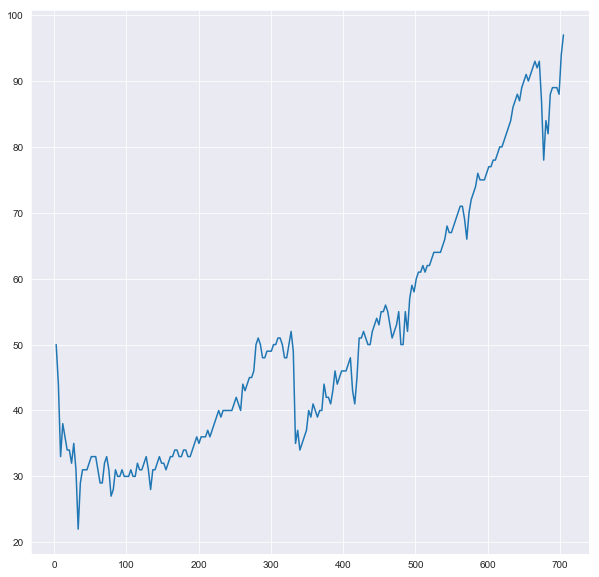

In [18]:
plt.title('arousal x time') 

fig,ax = plt.subplots(figsize=(10,10))

y  = [50.0,44.0,33.0,38.0,36.0,34.0,34.0,32.0,35.0,31.0,22.0,29.0,31.0,31.0,31.0,32.0,33.0,33.0,33.0,31.0,29.0,29.0,32.0,33.0,31.0,27.0,28.0,31.0,30.0,30.0,31.0,30.0,30.0,30.0,31.0,30.0,30.0,32.0,31.0,31.0,32.0,33.0,31.0,28.0,31.0,31.0,32.0,33.0,32.0,32.0,31.0,32.0,33.0,33.0,34.0,34.0,33.0,33.0,34.0,34.0,33.0,33.0,34.0,35.0,36.0,35.0,36.0,36.0,36.0,37.0,36.0,37.0,38.0,39.0,40.0,39.0,40.0,40.0,40.0,40.0,40.0,41.0,42.0,41.0,40.0,44.0,43.0,44.0,45.0,45.0,46.0,50.0,51.0,50.0,48.0,48.0,49.0,49.0,49.0,50.0,50.0,51.0,51.0,50.0,48.0,48.0,50.0,52.0,49.0,35.0,37.0,34.0,35.0,36.0,37.0,40.0,39.0,41.0,40.0,39.0,40.0,40.0,44.0,42.0,42.0,41.0,43.0,46.0,44.0,45.0,46.0,46.0,46.0,47.0,48.0,43.0,41.0,45.0,51.0,51.0,52.0,51.0,50.0,50.0,52.0,53.0,54.0,53.0,55.0,55.0,56.0,55.0,53.0,51.0,52.0,53.0,55.0,50.0,50.0,55.0,52.0,57.0,59.0,58.0,60.0,61.0,61.0,62.0,61.0,62.0,62.0,63.0,64.0,64.0,64.0,64.0,65.0,66.0,68.0,67.0,67.0,68.0,69.0,70.0,71.0,71.0,69.0,66.0,70.0,72.0,73.0,74.0,76.0,75.0,75.0,75.0,76.0,77.0,77.0,78.0,78.0,79.0,80.0,80.0,81.0,82.0,83.0,84.0,86.0,87.0,88.0,87.0,89.0,90.0,91.0,90.0,91.0,92.0,93.0,92.0,93.0,87.0,78.0,84.0,82.0,88.0,89.0,89.0,89.0,88.0,94.0,97.0]
x =[3.035184144973755,6.062493801116943,9.108428955078125,12.150734901428223,15.185662269592286,18.22866439819336,21.27399444580078,24.317472457885743,27.347564697265626,30.394794464111329,33.44142532348633,36.46626663208008,39.4891242980957,42.52622985839844,45.566890716552737,48.592830657958987,51.62393569946289,54.66682052612305,57.70920181274414,60.751548767089847,63.77582550048828,66.81647491455078,69.86357879638672,72.89205932617188,75.92414093017578,78.96802520751953,82.01396942138672,85.03993225097656,88.0659408569336,91.09619903564453,94.1219482421875,97.16910552978516,100.20358276367188,103.25360870361328,106.30382537841797,109.34709167480469,112.39199829101563,115.43606567382813,118.4657211303711,121.49527740478516,124.56007385253906,127.5794677734375,130.62525939941407,133.67013549804688,136.69775390625,139.74639892578126,142.79443359375,145.82498168945313,148.85394287109376,151.8950653076172,154.9408721923828,157.9885711669922,161.01724243164063,164.06533813476563,167.11032104492188,170.15672302246095,173.1855010986328,176.23422241210938,179.26577758789063,182.30828857421876,185.3379669189453,188.37767028808595,191.4240264892578,194.468017578125,197.50164794921876,200.55010986328126,203.57659912109376,206.6258544921875,209.67190551757813,212.7181854248047,215.74444580078126,218.79373168945313,221.8231964111328,224.84246826171876,227.88412475585938,230.92352294921876,233.95095825195313,236.99514770507813,240.0248565673828,243.05149841308595,246.08294677734376,249.11399841308595,252.14625549316407,255.19129943847657,258.2348327636719,261.2674560546875,264.2963562011719,267.33465576171877,270.38323974609377,273.4283752441406,276.4629821777344,279.498046875,282.54388427734377,285.56170654296877,288.5792236328125,291.6164245605469,294.6571044921875,297.6929626464844,300.73443603515627,303.7649230957031,306.814453125,309.8357849121094,312.87664794921877,315.91986083984377,318.9647216796875,322.01043701171877,325.03863525390627,328.07061767578127,331.0991516113281,334.145263671875,337.1792907714844,340.2259521484375,343.2571105957031,346.2997741699219,349.33905029296877,352.3830261230469,355.4072570800781,358.453369140625,361.4989013671875,364.52557373046877,367.5694274902344,370.6141357421875,373.64935302734377,376.69293212890627,379.7204284667969,382.75457763671877,385.7996826171875,388.849365234375,391.8981628417969,394.9464111328125,397.9758605957031,401.01861572265627,404.06341552734377,407.0903625488281,410.1114196777344,413.1304016113281,416.1497802734375,419.1982727050781,422.2270202636719,425.27264404296877,428.28997802734377,431.33782958984377,434.3761291503906,437.41485595703127,440.46429443359377,443.5106506347656,446.55230712890627,449.6010437011719,452.64300537109377,455.6889343261719,458.73651123046877,461.7832336425781,464.8155212402344,467.8428955078125,470.8816223144531,473.91876220703127,476.96331787109377,480.0003967285156,483.043212890625,486.0811767578125,489.124267578125,492.1651306152344,495.18695068359377,498.225341796875,501.2731018066406,504.2906188964844,507.3343200683594,510.3778381347656,513.413330078125,516.4591064453125,519.5057983398438,522.5345458984375,525.5833740234375,528.626953125,531.66162109375,534.68798828125,537.7355346679688,540.7528686523438,543.7908325195313,546.8319091796875,549.8801879882813,552.9266357421875,555.9603881835938,559.0088500976563,562.0280151367188,565.0745849609375,568.1190795898438,571.16650390625,574.2041625976563,577.2526245117188,580.2996826171875,583.3411865234375,586.3865966796875,589.4312744140625,592.4692993164063,595.504638671875,598.5425415039063,601.58251953125,604.6223754882813,607.6674194335938,610.6888427734375,613.7247314453125,616.7544555664063,619.7972412109375,622.8414916992188,625.886962890625,628.9188232421875,631.9526977539063,634.9967041015625,638.0422973632813,641.0917358398438,644.1362915039063,647.1854858398438,650.2213134765625,653.269287109375,656.3087158203125,659.340087890625,662.3856811523438,665.435546875,668.4699096679688,671.5025024414063,674.5375366210938,677.567138671875,680.610595703125,683.634521484375,686.6780395507813,689.7284545898438,692.7572631835938,695.8056030273438,698.837158203125,701.8809204101563,704.910400390625]


plt.plot(x, y)

fig.savefig('figura.png')


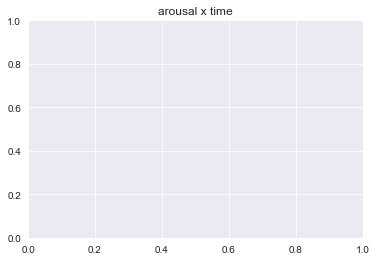

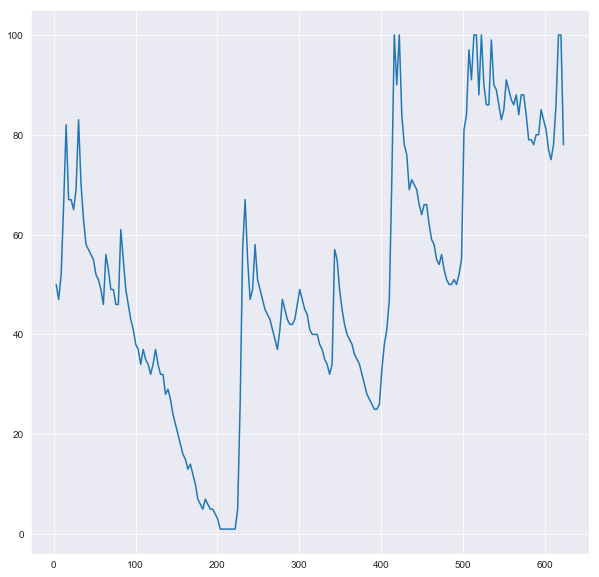

In [19]:
plt.title('arousal x time') 

fig,ax = plt.subplots(figsize=(10,10))

y  = [50.0,47.0,52.0,66.0,82.0,67.0,67.0,65.0,69.0,83.0,70.0,63.0,58.0,57.0,56.0,55.0,52.0,51.0,49.0,46.0,56.0,53.0,49.0,49.0,46.0,46.0,61.0,55.0,49.0,46.0,43.0,41.0,38.0,37.0,34.0,37.0,35.0,34.0,32.0,34.0,37.0,34.0,32.0,32.0,28.0,29.0,27.0,24.0,22.0,20.0,18.0,16.0,15.0,13.0,14.0,12.0,10.0,7.0,6.0,5.0,7.0,6.0,5.0,5.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,26.0,57.0,67.0,55.0,47.0,49.0,58.0,51.0,49.0,47.0,45.0,44.0,43.0,41.0,39.0,37.0,41.0,47.0,45.0,43.0,42.0,42.0,43.0,46.0,49.0,47.0,45.0,44.0,41.0,40.0,40.0,40.0,38.0,37.0,35.0,34.0,32.0,34.0,57.0,55.0,49.0,45.0,42.0,40.0,39.0,38.0,36.0,35.0,34.0,32.0,30.0,28.0,27.0,26.0,25.0,25.0,26.0,33.0,38.0,41.0,47.0,71.0,100.0,90.0,100.0,84.0,78.0,76.0,69.0,71.0,70.0,69.0,66.0,64.0,66.0,66.0,62.0,59.0,58.0,55.0,54.0,56.0,53.0,51.0,50.0,50.0,51.0,50.0,52.0,55.0,81.0,84.0,97.0,91.0,100.0,100.0,88.0,100.0,90.0,86.0,86.0,99.0,90.0,89.0,86.0,83.0,85.0,91.0,89.0,87.0,86.0,88.0,84.0,88.0,88.0,84.0,79.0,79.0,78.0,80.0,80.0,85.0,83.0,81.0,77.0,75.0,78.0,86.0,100.0,100.0,78.0]
x =[3.045058012008667,6.070611953735352,9.114860534667969,12.15708065032959,15.197525024414063,18.228254318237306,21.25667953491211,24.30648422241211,27.344297409057618,30.387365341186525,33.42386245727539,36.449459075927737,39.48759460449219,42.51559066772461,45.55712890625,48.57429504394531,51.62309265136719,54.6567268371582,57.70735549926758,60.735836029052737,63.783714294433597,66.82854461669922,69.86820220947266,72.90863037109375,75.95747375488281,79.00159454345703,82.03057861328125,85.0588607788086,88.10336303710938,91.14823913574219,94.19100189208985,97.2166748046875,100.24864196777344,103.29778289794922,106.34767150878906,109.3751449584961,112.39739227294922,115.41700744628906,118.4437026977539,121.47188568115235,124.49837493896485,127.52208709716797,130.56982421875,133.61444091796876,136.6609649658203,139.70736694335938,142.7376251220703,145.78709411621095,148.81591796875,151.85922241210938,154.90235900878907,157.92494201660157,160.96568298339845,164.01321411132813,167.05836486816407,170.08653259277345,173.1290740966797,176.1795196533203,179.2265167236328,182.25375366210938,185.278076171875,188.31930541992188,191.36575317382813,194.4141082763672,197.46067810058595,200.5083465576172,203.54408264160157,206.59085083007813,209.63711547851563,212.6812286376953,215.72857666015626,218.77841186523438,221.81947326660157,224.8482666015625,227.89552307128907,230.93690490722657,233.97467041015626,237.01739501953126,240.06333923339845,243.08975219726563,246.12765502929688,249.15675354003907,252.19007873535157,255.23699951171876,258.2658996582031,261.30853271484377,264.3319396972656,267.3760070800781,270.4202880859375,273.4523620605469,276.48846435546877,279.5234680175781,282.5573425292969,285.603759765625,288.6280212402344,291.6546936035156,294.67822265625,297.72247314453127,300.7698669433594,303.8083190917969,306.8552551269531,309.8837890625,312.9208984375,315.9700622558594,319.01629638671877,322.0576171875,325.1024475097656,328.13702392578127,331.18560791015627,334.22076416015627,337.2635498046875,340.3064270019531,343.3515930175781,346.3929443359375,349.43487548828127,352.46063232421877,355.4955749511719,358.54632568359377,361.5918273925781,364.630126953125,367.6679992675781,370.7098083496094,373.74359130859377,376.77978515625,379.82440185546877,382.8647766113281,385.9089050292969,388.9578552246094,392.0036926269531,395.0362243652344,398.08392333984377,401.1180725097656,404.1355285644531,407.18170166015627,410.22906494140627,413.2786865234375,416.30682373046877,419.342041015625,422.4038391113281,425.44921875,428.49530029296877,431.5372314453125,434.5811767578125,437.6158447265625,440.6517639160156,443.697265625,446.7419738769531,449.7775573730469,452.8201904296875,455.8680419921875,458.9030456542969,461.94549560546877,464.97509765625,468.02203369140627,471.0691833496094,474.0966491699219,477.1413269042969,480.1767578125,483.2249450683594,486.27301025390627,489.3184814453125,492.3634948730469,495.4107666015625,498.4544677734375,501.50244140625,504.5310974121094,507.5676574707031,510.5844421386719,513.6322021484375,516.677001953125,519.7069091796875,522.7528076171875,525.7872924804688,528.8363647460938,531.8853149414063,534.9325561523438,537.9786987304688,541.0250854492188,544.0674438476563,547.1130981445313,550.1625366210938,553.2105712890625,556.2459106445313,559.2634887695313,562.2996215820313,565.3455200195313,568.3928833007813,571.4346923828125,574.4749755859375,577.52099609375,580.5477294921875,583.5932006835938,586.62890625,589.6746215820313,592.7114868164063,595.7312622070313,598.774658203125,601.8084716796875,604.8355102539063,607.8826904296875,610.90869140625,613.9525756835938,616.9816284179688,620.025634765625,623.0701293945313]


plt.plot(x, y)

fig.savefig('figura.png')

[[1.         0.47672015]
 [0.47672015 1.        ]] 0.22726209960252486


<Figure size 360x720 with 0 Axes>

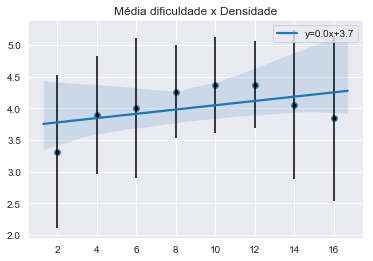

<Figure size 360x720 with 0 Axes>

In [20]:
teste = pegaColunas(df_final , 'nivelDivertido')
teste2 = pegaColunas(df_final , '')
plt.title('Média dificuldade x Densidade') 

x  = [ i*2 for i in range (1, 9)]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))
plt.figure(figsize=(5,10))

[[1.         0.58720711]
 [0.58720711 1.        ]] 0.3448121907147485


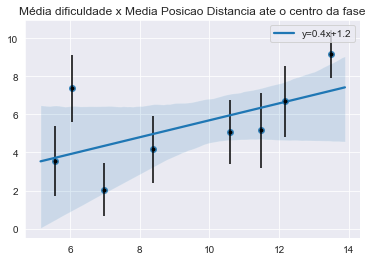

In [21]:
teste = pegaColunas(df_final , 'nota_dificuldade')

plt.title('Média dificuldade x Media Posicao Distancia ate o centro da fase') 

x  = [ 6.98, 5.56, 8.39, 10.58, 11.48, 12.18, 6.06, 13.48]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

[[1.         0.51007534]
 [0.51007534 1.        ]] 0.26017685545637226


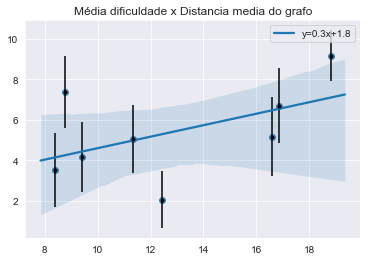

In [22]:
teste = pegaColunas(df_final , 'nota_dificuldade')

plt.title('Média dificuldade x Distancia media do grafo') 

x  = [ 12.45, 8.38, 9.4, 11.32, 16.58247, 16.86, 8.75 , 18.81]
sns.set_style("darkgrid")

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

[[1.         0.81943179]
 [0.81943179 1.        ]] 0.6714684628221486


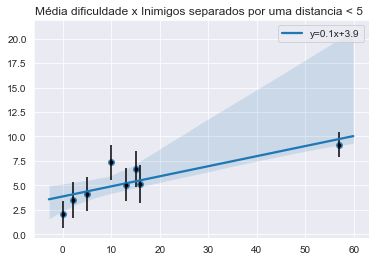

In [23]:
teste = pegaColunas(df_final , 'nota_dificuldade')

plt.title('Média dificuldade x Inimigos separados por uma distancia < 5 ') 

x  = [ 0 ,2 ,5 ,13 ,16 ,15 ,10,57]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

[[1.         0.77749405]
 [0.77749405 1.        ]] 0.6044970036666988


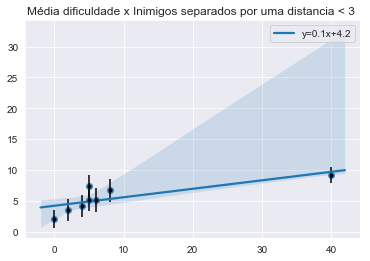

In [24]:
teste = pegaColunas(df_final , 'nota_dificuldade')

plt.title('Média dificuldade x Inimigos separados por uma distancia < 3 ') 

x  = [ 0 ,2 ,4 ,5,6 ,8 ,5,40]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

[[1.         0.81511729]
 [0.81511729 1.        ]] 0.664416203663268


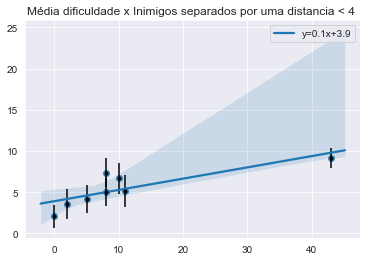

In [25]:
teste = pegaColunas(df_final , 'nota_dificuldade')

plt.title('Média dificuldade x Inimigos separados por uma distancia < 4 ') 

x  = [ 0 ,2 ,5 ,8, 11 ,10 ,8, 43]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

[[1.         0.92901238]
 [0.92901238 1.        ]] 0.8630640057677285


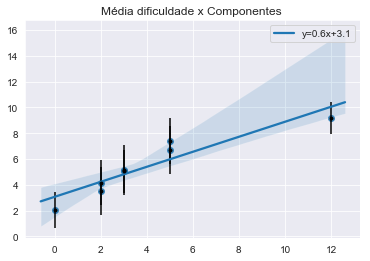

In [26]:
teste = pegaColunas(df_final , 'nota_dificuldade')

plt.title('Média dificuldade x Componentes ') 

x  = [ 0 ,2,2,3,3,5,5,12]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );



#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

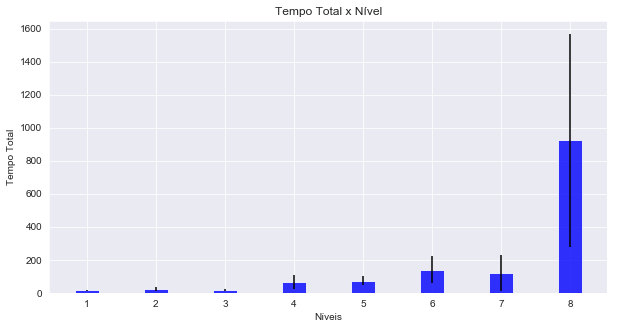

In [27]:
#Gerar gráfico de nivel x tempo medio total

tempo_total_col = pegaColunas(df_final[filtroCheat], 'tempoTotal_')
tempo_total_mean = tempo_total_col.mean().values[1:]
tempo_total_std = tempo_total_col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8
sns.set_style("whitegrid")

rects1 = plt.bar(index  , tempo_total_mean , bar_width  , alpha = opacity, color = 'b', yerr = tempo_total_std)
plt.xlabel('Níveis')
plt.ylabel('Tempo Total')
plt.title('Tempo Total x Nível')
plt.xticks(index , (index))
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('tempoTotalXnivel.png')



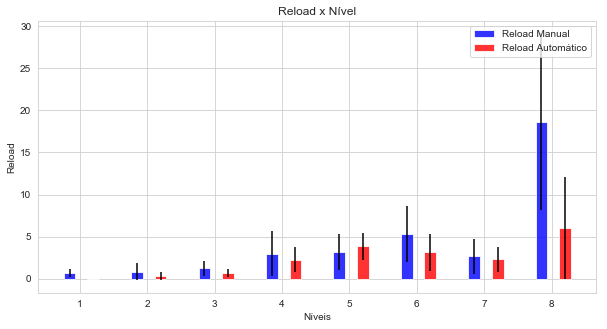

In [28]:
#Gerar gráfico de quantidade de reloads por nível

rel_manual_col = pegaColunas(df_final[filtroCheat], 'quantidadeReloadApertando')
rel_auto_col = pegaColunas(df_final[filtroCheat], 'quantidadeReloadAuto')

rel_manual_mean = rel_manual_col.mean().values[1:]
rel_manual_std = rel_manual_col.std().values[1:]

rel_auto_mean = rel_auto_col.mean().values[1:]
rel_auto_std = rel_auto_col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8
sns.set_style("whitegrid")

rects1 = plt.bar(index  , rel_manual_mean , bar_width * 0.5 , alpha = opacity, color = 'b', label = 'Reload Manual' , yerr = rel_manual_std)
rects2 = plt.bar(index  + bar_width , rel_auto_mean , bar_width * 0.5 , alpha = opacity,label = 'Reload Automático', color = 'r', yerr = rel_auto_std)
plt.xlabel('Níveis')
plt.ylabel('Reload')
plt.title('Reload x Nível')
plt.xticks(index + 0.15 , (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('qtd_reloadsXnivel.png')

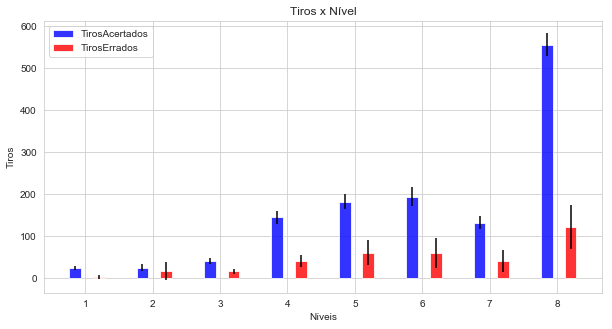

In [29]:
#Gerar gráfico de quantidade de reloads por nível

tiros_acer = pegaColunas(df_final[filtroCheat], 'quantidadeTirosAcertadosCausandoDano') 
tiros_acer2 = pegaColunas(df_final[filtroCheat], 'quantidadeTirosAcertadosSemCausarDano') 
tiros_err = pegaColunas(df_final[filtroCheat], 'quantidadeTirosErrados_')

tiros_acer_mean = tiros_acer.mean().values[1:] + tiros_acer2.mean().values[1:]
tiros_acer_std = tiros_acer.std().values[1:]  + tiros_acer2.std().values[1:]

tiros_err_mean = tiros_err.mean().values[1:]
tiros_err_std = tiros_err.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8
sns.set_style("whitegrid")

rects1 = plt.bar(index  , tiros_acer_mean , bar_width * 0.5 , alpha = opacity, color = 'b', label = 'TirosAcertados' , yerr = tiros_acer_std)
rects2 = plt.bar(index  + bar_width , tiros_err_mean , bar_width * 0.5 , alpha = opacity,label = 'TirosErrados', color = 'r', yerr = tiros_err_std)
plt.xlabel('Níveis')
plt.ylabel('Tiros')
plt.title('Tiros x Nível')
plt.xticks(index + 0.15 , (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('tirosAcerErroXnivel.png')

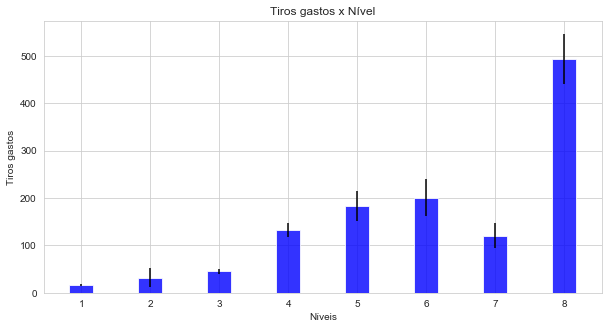

In [30]:
#nivel x  tiros gastos



col = pegaColunas(df_final[filtroCheat], 'quantidadeTiros_')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8
sns.set_style("whitegrid")

rects1 = plt.bar(index  , col_mean , bar_width  , alpha = opacity, color = 'b', yerr = col_std)
plt.xlabel('Níveis')
plt.ylabel('Tiros gastos')
plt.title('Tiros gastos x Nível')
plt.xticks(index , (index))
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('tirosGastosXnivel.png')

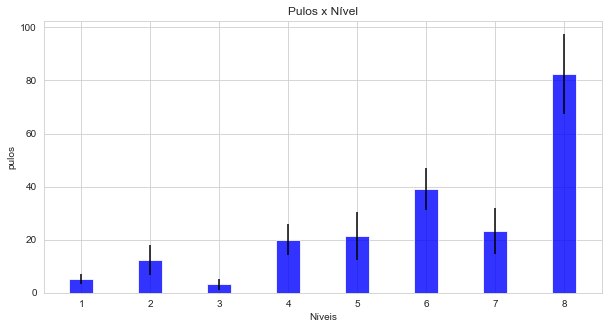

In [31]:
#nivel x  pulos

col = pegaColunas(df_final[filtroCheat], 'quantidadePulos_')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8
sns.set_style("whitegrid")

rects1 = plt.bar(index  , col_mean , bar_width  , alpha = opacity, color = 'b', yerr = col_std)
plt.xlabel('Níveis')
plt.ylabel('pulos')
plt.title('Pulos x Nível')
plt.xticks(index , (index))
#plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('pulosXnivel.png')

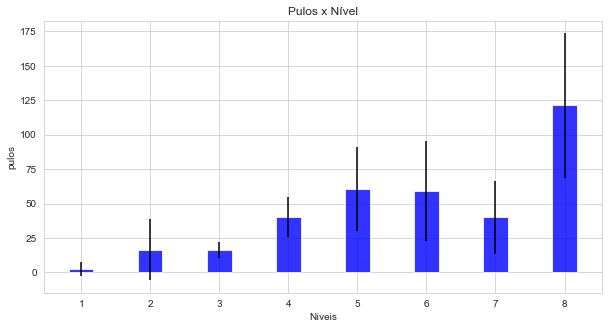

In [32]:
#nivel x  pulos

col = pegaColunas(df_final[filtroCheat], 'quantidadeTirosErrados')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8
sns.set_style("whitegrid")

rects1 = plt.bar(index  , col_mean , bar_width  , alpha = opacity, color = 'b', yerr = col_std)
plt.xlabel('Níveis')
plt.ylabel('pulos')
plt.title('Pulos x Nível')
plt.xticks(index , (index))
#plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('pulosXnivel.png')

[[1.         0.85745856]
 [0.85745856 1.        ]] 0.7352351884245008


<Figure size 360x720 with 0 Axes>

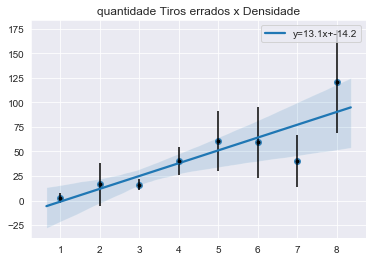

<Figure size 360x720 with 0 Axes>

In [102]:
#dash x densidade

col = pegaColunas(df_final[filtroCheat], 'quantidadeTirosErrados_')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

plt.title('quantidade Tiros errados x Densidade') 

x  = [ i for i in range (1, 9)]
sns.set_style("darkgrid")

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, col_mean)

sns.regplot(x, col_mean , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, col_mean, yerr= col_std, fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x,col_mean), r2(x, col_mean))
plt.figure(figsize=(5,10))

[[1.         0.79027917]
 [0.79027917 1.        ]] 0.624541171968736


<Figure size 360x720 with 0 Axes>

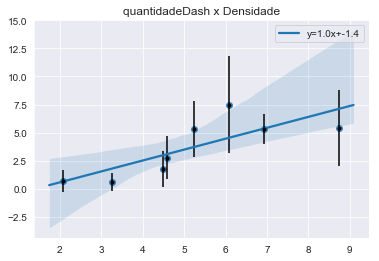

<Figure size 360x720 with 0 Axes>

In [105]:
#dash x densidade

col = pegaColunas(df_final[filtroCheat], 'quantidadeDash_')
col2 = pegaColunas(df_final[filtroCheat], 'dificuldade_')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

col_mean2 = col2.mean().values[1:]
col_std2 = col2.std().values[1:]


plt.title('quantidadeDash x Densidade') 

x  = [ i for i in range (1, 9)]
sns.set_style("darkgrid")

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(col_mean2, col_mean)

sns.regplot(col_mean2, col_mean , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(col_mean2, col_mean, yerr= col_std, fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(col_mean2,col_mean), r2(col_mean2, col_mean))
plt.figure(figsize=(5,10))

[[1.         0.99769852]
 [0.99769852 1.        ]] 0.9954023398648719


<Figure size 360x720 with 0 Axes>

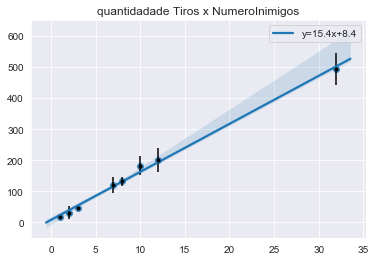

<Figure size 360x720 with 0 Axes>

In [35]:
col = pegaColunas(df_final[filtroCheat], 'quantidadeTiros_')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

plt.title('quantidadade Tiros x NumeroInimigos') 

x  = [ 1,2,3,8,10,12,7,32]
sns.set_style("darkgrid")

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, col_mean)

sns.regplot(x, col_mean , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, col_mean, yerr= col_std, fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x,col_mean), r2(x, col_mean))
plt.figure(figsize=(5,10))

[[1.        0.9864211]
 [0.9864211 1.       ]] 0.9730265799137817


<Figure size 360x720 with 0 Axes>

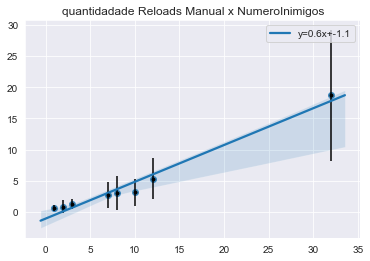

<Figure size 360x720 with 0 Axes>

In [36]:
col = pegaColunas(df_final[filtroCheat], 'quantidadeReloadApertando')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

plt.title('quantidadade Reloads Manual x NumeroInimigos') 

x  = [ 1,2,3,8,10,12,7,32]
sns.set_style("darkgrid")

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, col_mean)

sns.regplot(x, col_mean , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, col_mean, yerr= col_std, fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x,col_mean), r2(x, col_mean))
plt.figure(figsize=(5,10))

[[1.         0.62414706]
 [0.62414706 1.        ]] 0.3895595480137628


<Figure size 360x720 with 0 Axes>

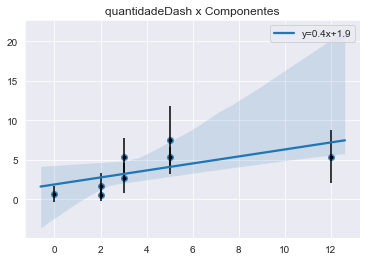

<Figure size 360x720 with 0 Axes>

In [37]:
#nivel x  pulos

col = pegaColunas(df_final[filtroCheat], 'quantidadeDash_')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

plt.title('quantidadeDash x Componentes') 

x  =  [ 0 ,2,2,3,3,5,5,12]
sns.set_style("darkgrid")

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, col_mean)

sns.regplot(x, col_mean , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, col_mean, yerr= col_std, fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x,col_mean), r2(x, col_mean))
plt.figure(figsize=(5,10))

[[1.         0.60366798]
 [0.60366798 1.        ]] 0.3644150262445869


<Figure size 360x720 with 0 Axes>

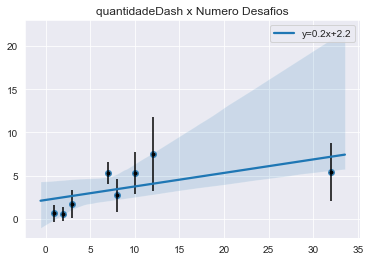

<Figure size 360x720 with 0 Axes>

In [38]:
#nivel x  pulos

col = pegaColunas(df_final[filtroCheat], 'quantidadeDash_')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

plt.title('quantidadeDash x Numero Desafios') 

x  =  [ 1,2,3,8,10,12,7,32]
sns.set_style("darkgrid")

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, col_mean)

sns.regplot(x, col_mean , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, col_mean, yerr= col_std, fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x,col_mean), r2(x, col_mean))
plt.figure(figsize=(5,10))

[[1.         0.96092371]
 [0.96092371 1.        ]] 0.9233743707147912


<Figure size 360x720 with 0 Axes>

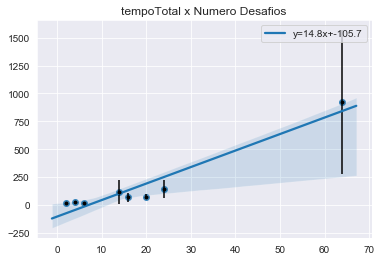

<Figure size 360x720 with 0 Axes>

In [106]:
#nivel x  pulos

col = pegaColunas(df_final[filtroCheat], 'tempoTotal_')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

plt.title('tempoTotal x Numero Desafios') 

x  =  [ 2,4,6,16,20,24,14,64]

sns.set_style("darkgrid")

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, col_mean)

sns.regplot(x, col_mean , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, col_mean, yerr= col_std, fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x,col_mean), r2(x, col_mean))
plt.figure(figsize=(5,10))

[[1.         0.96092371]
 [0.96092371 1.        ]] 0.9233743707147912


<Figure size 360x720 with 0 Axes>

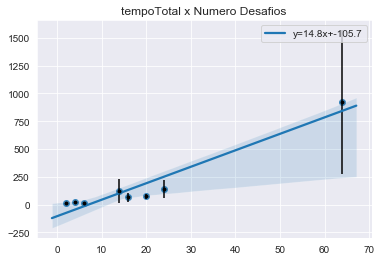

<Figure size 360x720 with 0 Axes>

In [112]:
#nivel x  pulos

col = pegaColunas(df_final[filtroCheat], 'tempoTotal_')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

plt.title('tempoTotal x Numero Desafios') 

x  =  [ 2,4,6,16,20,24,14,64]

sns.set_style("darkgrid")

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, col_mean)

sns.regplot(x, col_mean , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, col_mean, yerr= col_std, fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x,col_mean), r2(x, col_mean))
plt.figure(figsize=(5,10))

#### 

[[1.         0.96092371]
 [0.96092371 1.        ]] 0.9233743707147912


<Figure size 360x720 with 0 Axes>

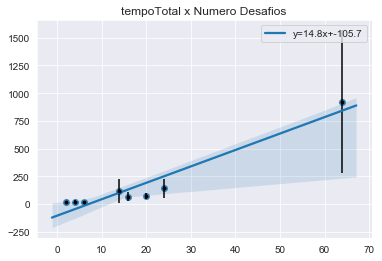

<Figure size 360x720 with 0 Axes>

In [113]:
#nivel x  pulos

col = pegaColunas(df_final[filtroCheat], 'tempoTotal_')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

plt.title('tempoTotal x Numero Desafios') 

x  =  [ 2,4,6,16,20,24,14,64]

sns.set_style("darkgrid")

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, col_mean)

sns.regplot(x, col_mean , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, col_mean, yerr= col_std, fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x,col_mean), r2(x, col_mean))
plt.figure(figsize=(5,10))

[[1.         0.85395805]
 [0.85395805 1.        ]] 0.7292443581627042


<Figure size 360x720 with 0 Axes>

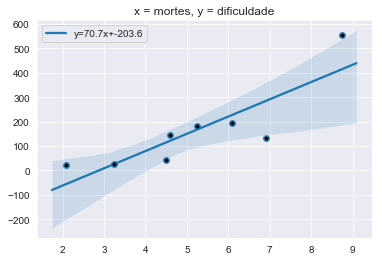

<Figure size 360x720 with 0 Axes>

In [117]:
#nivel x  pulos

tiros_acer = pegaColunas(df_final[filtroCheat], 'quantidadeTirosAcertadosCausandoDano') 
tiros_acer2 = pegaColunas(df_final[filtroCheat], 'quantidadeTirosAcertadosSemCausarDano') 
tiros_err = pegaColunas(df_final[filtroCheat], 'quantidadeTirosTiros_')

tiros_acer_mean = (tiros_acer.mean().values[1:] + tiros_acer2.mean().values[1:]) / tiros_err.mean().values[1:]
tiros_acer_std = tiros_acer.std().values[1:]  + tiros_acer2.std().values[1:]


col = pegaColunas(df_final[filtroCheat], 'quantidadeTirosAcertadosSemCausarDano')
col2 = pegaColunas(df_final[filtroCheat], 'dificuldade_')

#quantidade tiros influencia no desempenho, pois quanto maior a difiucldade do nivel mais tiros o cara tem que acertar, caso ele erre ele sentira mais dificuldade que sua habilidade???

col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

col_mean2 = col2.mean().values[1:]
col_std2 = col2.std().values[1:]

plt.title('x = mortes, y = dificuldade') 

x  =  [ 2,4,6,8,10,12,14,16]

sns.set_style("darkgrid")

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(col_mean2, col_mean)

sns.regplot(col_mean2, col_mean, marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(col_mean2, col_mean, yerr= col_std, fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(col_mean2,col_mean), r2(col_mean2, col_mean))
plt.figure(figsize=(5,10))